In [1]:
import gc, os, cv2, PIL, torch
import torchvision as tv
import torch.nn as nn
import torchsummary as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

/home/asus/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels_df = pd.read_csv('/home/asus/Desktop/Office/traffic sign recognition/labels.csv')
labels_df

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [4]:
%%time 
data_dir = '/home/asus/Desktop/Office/traffic sign recognition/myData'
x, y = [], []

for folder in range(43):
    folder_path = os.path.join(data_dir, str(folder))
    count = 0
    for i, img in enumerate(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, img)
    
        img_tensor = tv.transforms.ToTensor()(PIL.Image.open(img_path))
        x.append(img_tensor.numpy())
        y.append(folder)
        count += 1
    print(f'folder {folder} has {count} images')

x = np.array(x)
y = np.array(y)

folder 0 has 451 images
folder 1 has 4920 images
folder 2 has 2610 images
folder 3 has 2670 images
folder 4 has 3750 images
folder 5 has 3510 images
folder 6 has 780 images
folder 7 has 2730 images
folder 8 has 2670 images
folder 9 has 2790 images
folder 10 has 3810 images
folder 11 has 2490 images
folder 12 has 3990 images
folder 13 has 4080 images
folder 14 has 1470 images
folder 15 has 1170 images
folder 16 has 780 images
folder 17 has 2100 images
folder 18 has 2280 images
folder 19 has 390 images
folder 20 has 660 images
folder 21 has 600 images
folder 22 has 720 images
folder 23 has 960 images
folder 24 has 510 images
folder 25 has 2850 images
folder 26 has 1140 images
folder 27 has 450 images
folder 28 has 1020 images
folder 29 has 510 images
folder 30 has 840 images
folder 31 has 1470 images
folder 32 has 450 images
folder 33 has 1288 images
folder 34 has 780 images
folder 35 has 2280 images
folder 36 has 720 images
folder 37 has 390 images
folder 38 has 3930 images
folder 39 ha

In [5]:
np.unique(y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([ 451, 4920, 2610, 2670, 3750, 3510,  780, 2730, 2670, 2790, 3810,
        2490, 3990, 4080, 1470, 1170,  780, 2100, 2280,  390,  660,  600,
         720,  960,  510, 2850, 1140,  450, 1020,  510,  840, 1470,  450,
        1288,  780, 2280,  720,  390, 3930,  570,  660,  450,  450]))

In [6]:
x = x.reshape(x.shape[0],3*32*32)
x,y = RandomOverSampler().fit_resample(x,y)
x = x.reshape(x.shape[0],3,32,32)
x.shape, y.shape

((211560, 3, 32, 32), (211560,))

In [7]:
np.unique(y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920]))

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,stratify=y)
del x,y

gc.collect()
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape 

((169248, 3, 32, 32), (42312, 3, 32, 32), (169248,), (42312,))

In [15]:
train_set = TensorDataset(xtrain,ytrain)
test_set = TensorDataset(xtest,ytest)
train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

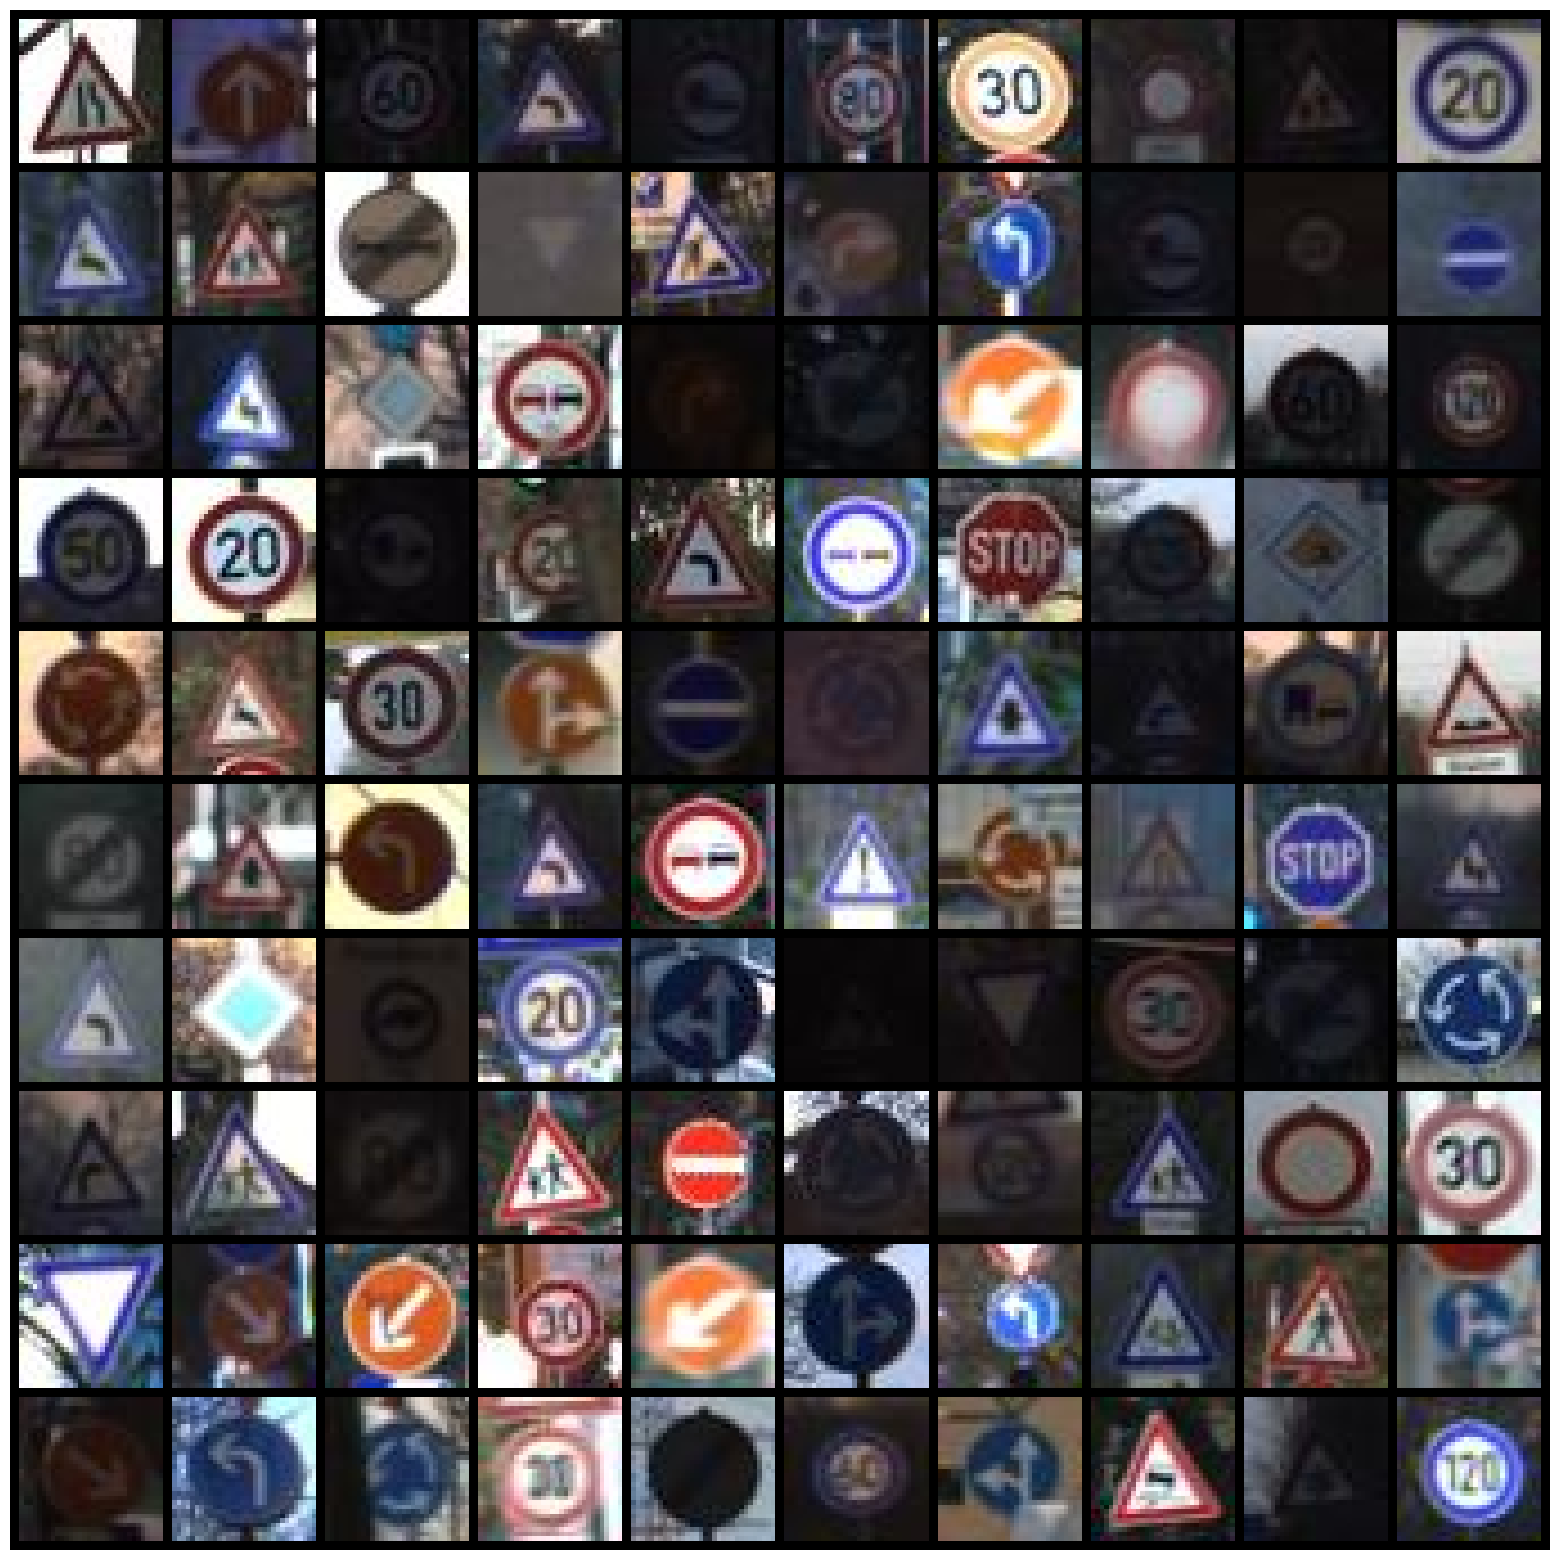



Labels of the above images :



array([24, 35,  3, 19, 10,  5,  1, 15, 28,  0, 31, 28, 41, 13, 25, 33, 34,
       10,  8, 17, 25, 21, 12,  9, 33, 42, 39, 15,  3,  8,  2,  0, 10,  0,
       19,  9, 14,  8, 12, 41, 40, 31,  1, 36, 17, 40, 11, 20, 10, 22,  6,
       11, 34, 19,  9, 18, 40, 24, 14, 21, 19, 12, 16,  0, 37, 19, 13,  1,
       42, 40, 20, 28,  6, 28, 17, 40,  8, 28, 15,  1, 13, 38, 39,  1, 39,
       36, 34, 29, 27, 36, 38, 34, 40,  1, 32,  3, 37, 23, 30,  8])

In [10]:
plt.figure(figsize=(20,20)) 
plt.imshow(tv.utils.make_grid(torch.tensor(xtrain[:100]),nrow=10).permute(1,2,0))
plt.axis('off') 
plt.show()
print('\n\nLabels of the above images :\n')
ytrain[:100]

In [11]:
xtrain = torch.from_numpy(xtrain) 
ytrain = torch.from_numpy(ytrain)
xtest = torch.from_numpy(xtest)
ytest = torch.from_numpy(ytest)

In [12]:
class TrafficCNN(nn.Module):
    
    def __init__(self):
        super(TrafficCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
             nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*7*7, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=43)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
                    

In [13]:
model = TrafficCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
print(model)

TrafficCNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=3136, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=43, bias=True)
)


In [ ]:
num_epochs = 5
count = 0

loss_list = []
iteration_list = []
accuracy_list = []
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images,labels in train_loader:
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(images.size(0), 3, 32, 32))
        labels = Variable(labels)
        outputs = model(train)
        loss = error(outputs, labels)
        
       
        optimizer.zero_grad()
        
     
        loss.backward()
     
        optimizer.step()
    
        count += 1
        if not (count % 50):    
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(images.size(0), 3, 32, 32))
            
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)     
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.07411918044090271, Accuracy: 95.4356918334961%
Iteration: 1000, Loss: 0.00694619957357645, Accuracy: 98.08032989501953%
